<a href="https://colab.research.google.com/github/Susena-V/SNA_Project/blob/main/Round-1_SNA_Facebook_Ego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Max Degree: 1045
Min Degree: 1
Average Degree: 43.69
Std Dev of Degree: 52.41


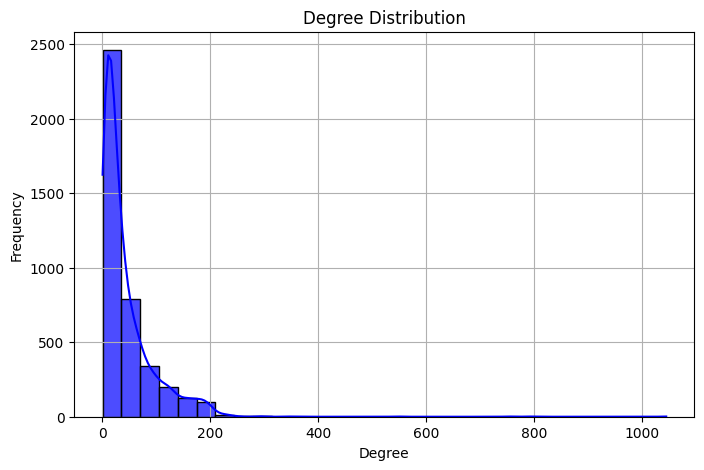

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load undirected graph from edge list file (ignoring comments)
file_path = "/content/facebook_combined.txt"

with open(file_path, "r") as f:
    edges = [line.strip().split() for line in f if not line.startswith("#")]

G = nx.Graph()
G.add_edges_from((int(u), int(v)) for u, v in edges)

# Compute degree statistics
degrees = dict(G.degree())
degree_values = list(degrees.values())

max_degree = max(degree_values)
min_degree = min(degree_values)
avg_degree = np.mean(degree_values)
std_degree = np.std(degree_values)

print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Std Dev of Degree: {std_degree:.2f}")

# Plot degree distribution
plt.figure(figsize=(8,5))
sns.histplot(degree_values, bins=30, color='blue', alpha=0.7, kde= True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.grid(True)
plt.show()


In [ ]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)



In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

print("Eigen Vector Centrality",eigenvector_centrality)

Eigen Vector Centrality {0: 3.391796172270201e-05, 1: 6.045346134948107e-07, 2: 2.2334609371911966e-07, 3: 6.635648083921052e-07, 4: 2.2364157028893605e-07, 5: 1.1833221118435216e-06, 6: 2.1709041695161263e-07, 7: 2.568510124822489e-05, 8: 2.1973746334830285e-07, 9: 2.214116624486093e-06, 10: 7.708567044092624e-07, 11: 2.1031233303459666e-07, 12: 2.1031233303459666e-07, 13: 1.103790547598573e-06, 14: 2.3055679294325335e-07, 15: 2.1031233303459666e-07, 16: 2.616513592117462e-07, 17: 2.2774170298520142e-07, 18: 2.1031233303459666e-07, 19: 2.3149092118602842e-07, 20: 2.3038875741121886e-07, 21: 2.5965755464539663e-05, 22: 1.0365420550578182e-06, 23: 2.327855955467465e-07, 24: 2.4875636881516775e-07, 25: 2.0920477409908786e-06, 26: 2.333621078244131e-06, 27: 3.8500493368810947e-07, 28: 2.276328150659143e-07, 29: 2.9276633115487333e-07, 30: 9.62912044010581e-07, 31: 1.4530295555049823e-06, 32: 2.172656002138456e-07, 33: 2.1162712130634827e-07, 34: 4.074184547679874e-06, 35: 2.11714028530404

In [ ]:
import networkx as nx
import numpy as np

# Compute largest eigenvalue of adjacency matrix
def compute_alpha(G):
    A = nx.to_numpy_array(G)
    eigenvalues = np.linalg.eigvals(A)
    lambda_max = max(abs(eigenvalues))
    return 0.85 / lambda_max

# Compute Katz centrality with adaptive alpha
alpha = compute_alpha(G)
try:
    katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=1.0, max_iter=5000, tol=1e-6)
except nx.PowerIterationFailedConvergence:
    katz_centrality = nx.katz_centrality(G, alpha=alpha/2, beta=1.0, max_iter=10000, tol=1e-6)

print("Katz Centrality computed successfully.")


In [ ]:
print(katz_centrality)

{0: 0.022180229053519455, 1: 0.008054836266980833, 2: 0.007707285623841941, 3: 0.008108429385735333, 4: 0.007691026104322191, 5: 0.007865796599165673, 6: 0.007528813399967366, 7: 0.008226128129499305, 8: 0.007606395917163336, 9: 0.00998767072714478, 10: 0.007786116223308561, 11: 0.007330920310913592, 12: 0.007330920310913592, 13: 0.008811371147340962, 14: 0.007915640157467823, 15: 0.007330920310913592, 16: 0.007698694765142215, 17: 0.007833991368792965, 18: 0.007330920310913592, 19: 0.007942651784518204, 20: 0.007911550777224148, 21: 0.01040280803189811, 22: 0.007773207611564944, 23: 0.007969861872364257, 24: 0.007975157162657424, 25: 0.010476920594033746, 26: 0.010524243457915677, 27: 0.007514091802443675, 28: 0.007831328179946596, 29: 0.007876535063171092, 30: 0.008104881586612555, 31: 0.008370328356490068, 32: 0.007533048695941134, 33: 0.007369498382831974, 34: 0.007623445955284753, 35: 0.007371607539300837, 36: 0.007746071892186169, 37: 0.007330920310913592, 38: 0.00769304429217169

In [ ]:
pagerank = nx.pagerank(G)
print("Page Rank Centrality")

Page Rank Centrality


In [ ]:
# Compute clustering coefficients
local_clustering = nx.clustering(G)
global_clustering = nx.transitivity(G)  # Also called transitivity

avg_local_clustering = np.mean(list(local_clustering.values()))

print(f"Average Local Clustering Coefficient: {avg_local_clustering:.4f}")
print(f"Global Clustering Coefficient: {global_clustering:.4f}")


Average Local Clustering Coefficient: 0.6055
Global Clustering Coefficient: 0.5192


In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("Betweeness Centrality")
print("Closeness Centrality")

print("Centrality measures computed successfully.")

Betweeness Centrality
Closeness Centrality
Centrality measures computed successfully.


In [ ]:
# Reciprocity (only for directed graphs, set "N/A" for undirected)
reciprocity = nx.reciprocity(G) if nx.is_directed(G) else "N/A"

print(f"Reciprocity: {reciprocity}")
print(f"Transitivity: {global_clustering:.4f}")


Reciprocity: N/A
Transitivity: 0.5192


In [ ]:
import pandas as pd

# Create DataFrame for centrality measures
df_centrality = pd.DataFrame({
    "Node": list(G.nodes()),
    "Degree Centrality": list(degree_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values()),
    "Katz Centrality": list(katz_centrality.values()),
    "PageRank": list(pagerank.values()),
    "Betweenness": list(betweenness_centrality.values()),
    "Closeness": list(closeness_centrality.values()),
})

# Creating separate DataFrames for top 10 nodes by each centrality measure (only Node and that centrality)
df_top10_degree = df_centrality[["Node", "Degree Centrality"]].sort_values(by="Degree Centrality", ascending=False).head(10)
df_top10_eigenvector = df_centrality[["Node", "Eigenvector Centrality"]].sort_values(by="Eigenvector Centrality", ascending=False).head(10)
df_top10_katz = df_centrality[["Node", "Katz Centrality"]].sort_values(by="Katz Centrality", ascending=False).head(10)
df_top10_pagerank = df_centrality[["Node", "PageRank"]].sort_values(by="PageRank", ascending=False).head(10)
df_top10_betweenness = df_centrality[["Node", "Betweenness"]].sort_values(by="Betweenness", ascending=False).head(10)
df_top10_closeness = df_centrality[["Node", "Closeness"]].sort_values(by="Closeness", ascending=False).head(10)

# Display the top 10 DataFrames


In [ ]:
df_top10_degree

,Node,Degree Centrality
107,107,0.258791
351,1684,0.196137
352,1912,0.186974
1821,3437,0.135463
0,0,0.085934
1490,2543,0.072808
2154,2347,0.072065
1373,1888,0.062902
1285,1800,0.060674
1149,1663,0.058197


In [ ]:
df_top10_eigenvector

,Node,Eigenvector Centrality
352,1912,0.095407
2145,2266,0.086983
3146,2206,0.086052
3169,2233,0.085173
3338,2464,0.084279
3106,2142,0.084193
3157,2218,0.084156
3058,2078,0.084136
3096,2123,0.083671
3002,1993,0.083532


In [ ]:
df_top10_katz

,Node,Katz Centrality
352,1912,0.096579
107,107,0.074989
2154,2347,0.066136
1490,2543,0.063046
2145,2266,0.062984
3169,2233,0.061612
3146,2206,0.061126
2995,1985,0.061017
3106,2142,0.060945
3157,2218,0.059951


In [ ]:
df_top10_pagerank

,Node,PageRank
1821,3437,0.007615
107,107,0.006936
351,1684,0.006367
0,0,0.006290
352,1912,0.003877
348,348,0.002348
1831,686,0.002219
1827,3980,0.002170
349,414,0.001800
1843,698,0.001317


In [ ]:
df_top10_betweenness

,Node,Betweenness
107,107,0.480518
351,1684,0.337797
1821,3437,0.236115
352,1912,0.229295
571,1085,0.149015
0,0,0.146306
1843,698,0.115330
1710,567,0.096310
58,58,0.084360
350,428,0.064309


In [ ]:
df_top10_closeness

,Node,Closeness
107,107,0.459699
58,58,0.397402
350,428,0.394837
371,563,0.393913
351,1684,0.393606
171,171,0.370493
348,348,0.369916
366,483,0.369848
349,414,0.369543
362,376,0.366558


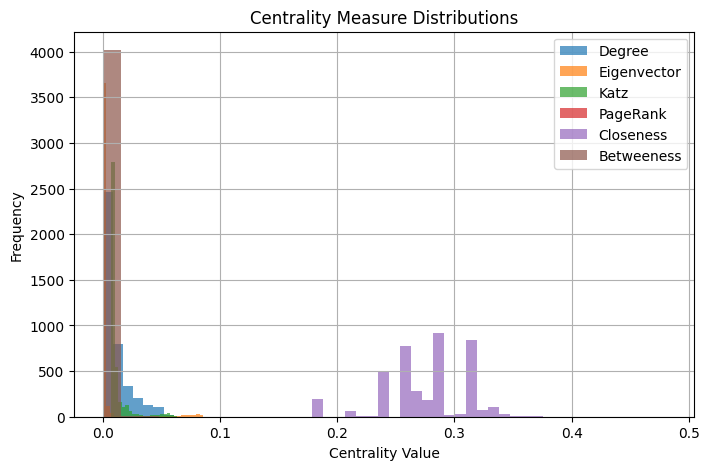

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(degree_centrality.values(), bins=30, alpha=0.7, label="Degree")
plt.hist(eigenvector_centrality.values(), bins=30, alpha=0.7, label="Eigenvector")
plt.hist(katz_centrality.values(), bins=30, alpha=0.7, label="Katz")
plt.hist(pagerank.values(), bins=30, alpha=0.7, label="PageRank")
plt.hist(closeness_centrality.values(), bins=30, alpha=0.7, label="Closeness")
plt.hist(betweenness_centrality.values(), bins=30, alpha=0.7, label="Betweeness")

plt.xlabel("Centrality Value")
plt.ylabel("Frequency")
plt.legend()
plt.title("Centrality Measure Distributions")
plt.grid(True)
plt.show()


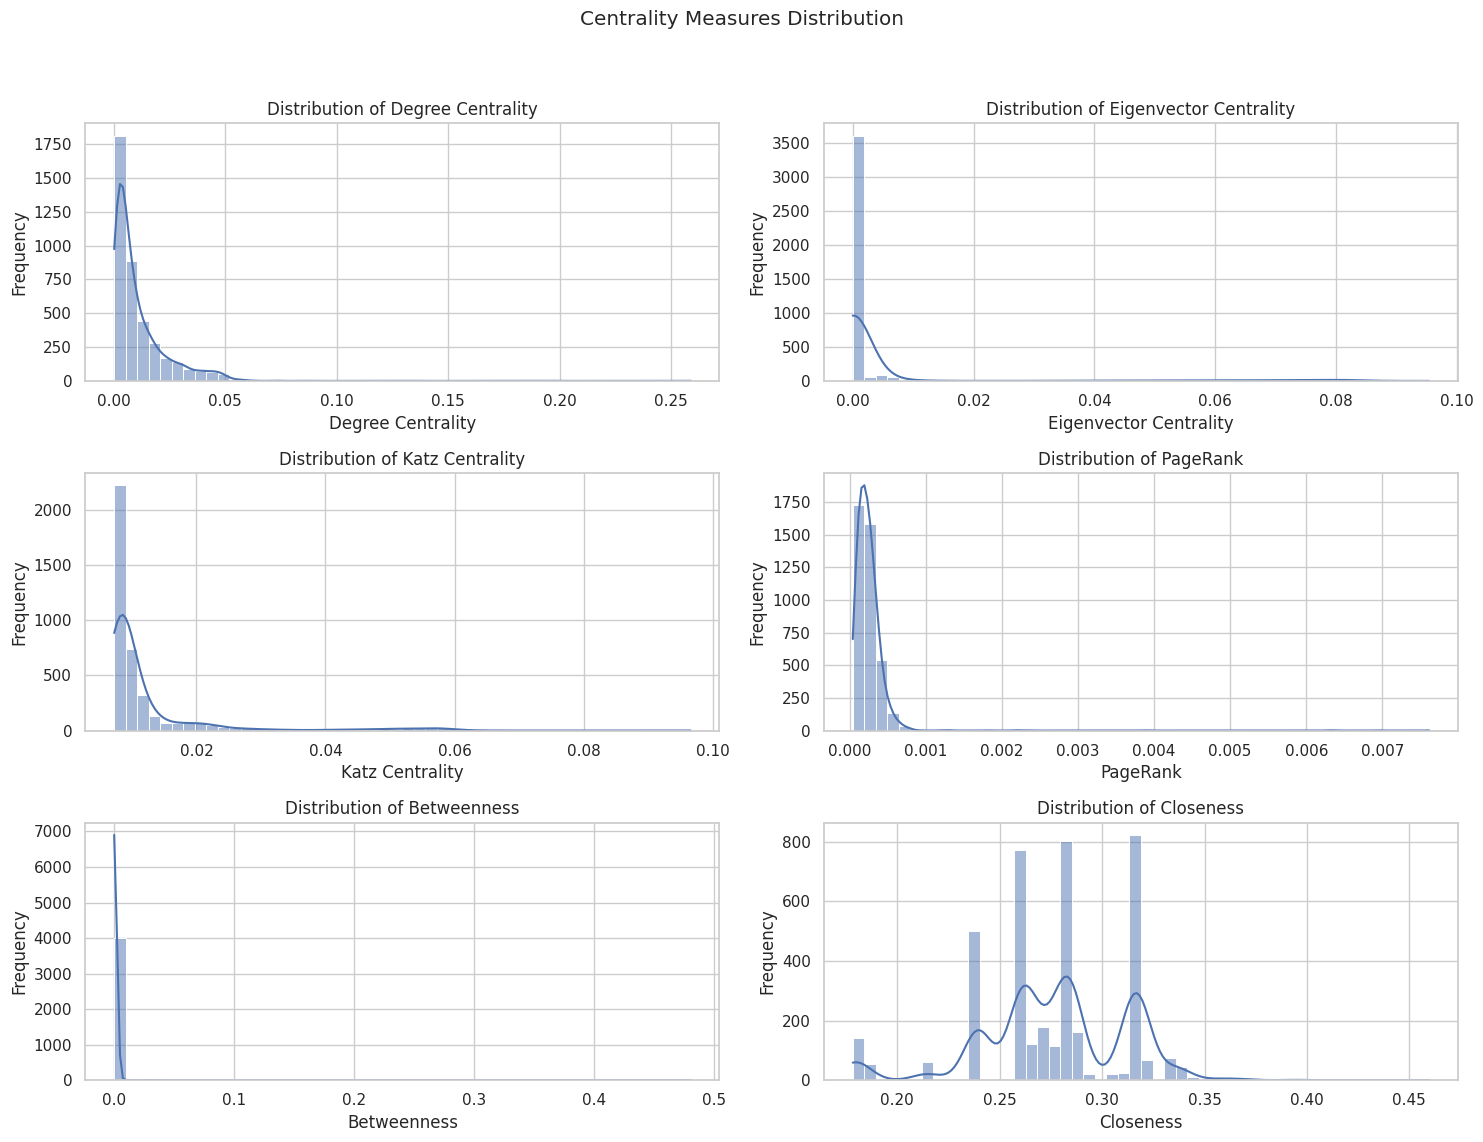

In [ ]:
import seaborn as sns

# Plot distribution of centrality measures
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Centrality Measures Distribution")

centrality_measures = ["Degree Centrality", "Eigenvector Centrality", "Katz Centrality", "PageRank", "Betweenness", "Closeness"]
axes = axes.flatten()

for i, measure in enumerate(centrality_measures):
    sns.histplot(df_centrality[measure], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {measure}")
    axes[i].set_xlabel(measure)
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Compute clustering coefficients
global_clustering = nx.average_clustering(G)
local_clustering = nx.clustering(G)

# Convert local clustering to DataFrame
df_clustering = pd.DataFrame({
    "Node": list(local_clustering.keys()),
    "Local Clustering": list(local_clustering.values())
})

# Sort and display top 10 nodes by local clustering coefficient
df_top10_clustering = df_clustering.sort_values(by="Local Clustering", ascending=False).head(10)


print(f"Global Clustering Coefficient: {global_clustering}")
df_top10_clustering
# Display global clustering coefficient


Global Clustering Coefficient: 0.6055467186200876


,Node,Local Clustering
2019,873,1.0
3905,3897,1.0
694,1208,1.0
3594,3560,1.0
662,1176,1.0
3598,3565,1.0
3605,3572,1.0
3608,3575,1.0
3614,3582,1.0
3620,3589,1.0


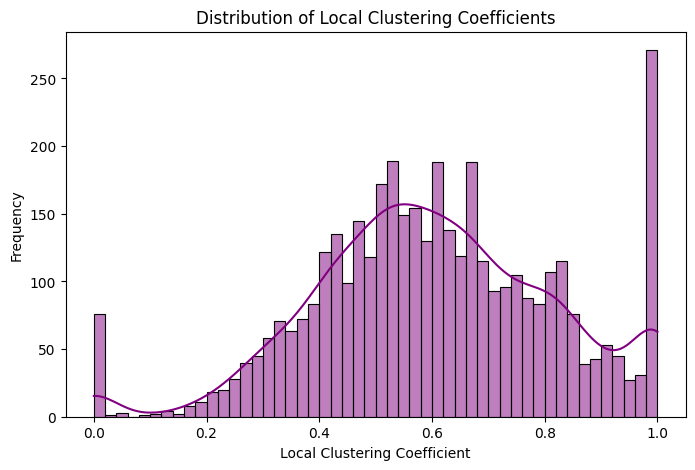

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_clustering["Local Clustering"], bins=50, kde=True, color="purple")
plt.title("Distribution of Local Clustering Coefficients")
plt.xlabel("Local Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()


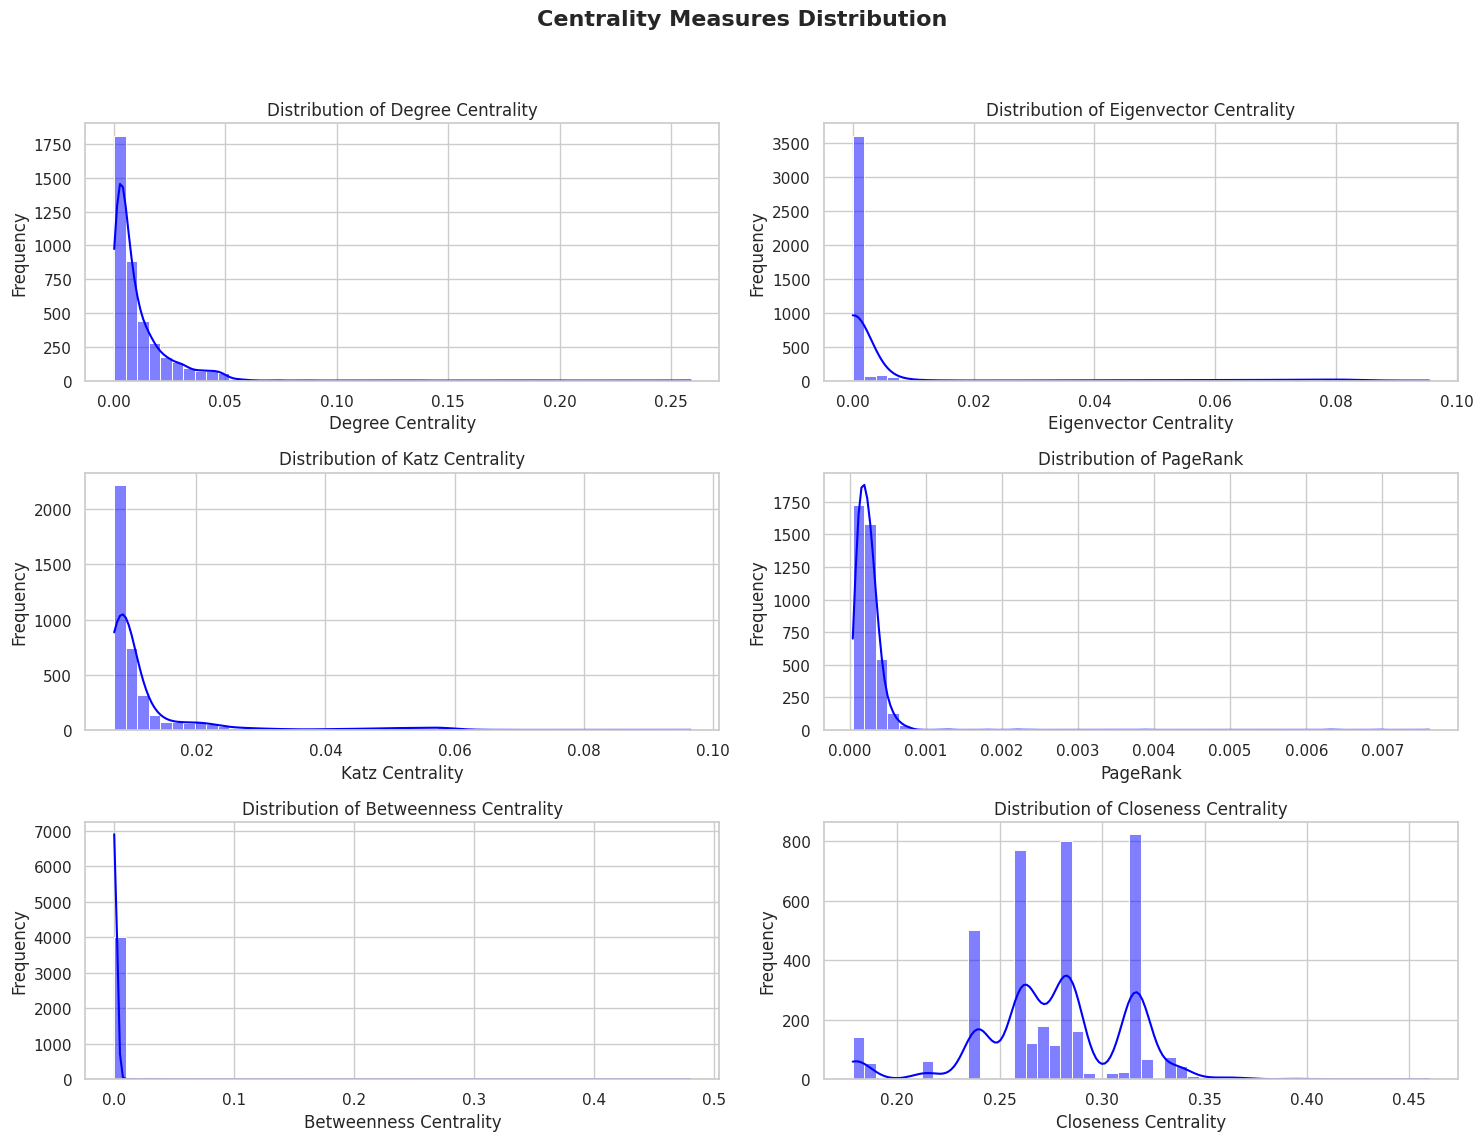

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Define the centrality measures to plot
centrality_measures = {
    "Degree Centrality": degree_centrality,
    "Eigenvector Centrality": eigenvector_centrality,
    "Katz Centrality": katz_centrality,
    "PageRank": pagerank,
    "Betweenness Centrality": betweenness_centrality,
    "Closeness Centrality": closeness_centrality
}

# Create subplots for each measure
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Centrality Measures Distribution", fontsize=16, fontweight='bold')

axes = axes.flatten()

# Plot each centrality measure
for i, (measure, values) in enumerate(centrality_measures.items()):
    sns.histplot(list(values.values()), bins=50, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {measure}", fontsize=12)
    axes[i].set_xlabel(measure)
    axes[i].set_ylabel("Frequency")

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


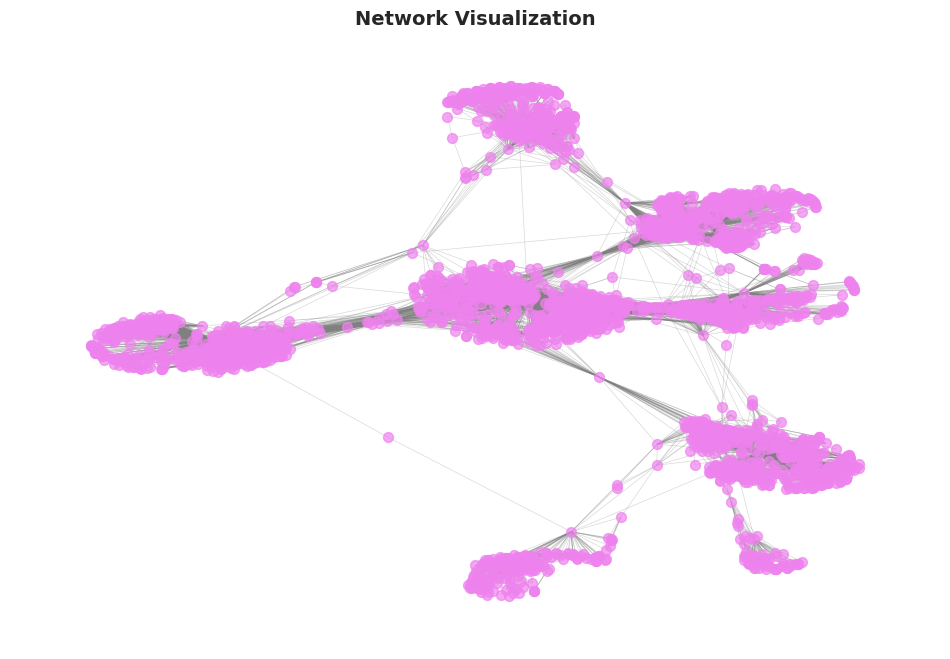

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 8))

# Define the layout (spring layout for better visualization)
pos = nx.spring_layout(G, seed=42)  # seed ensures consistent layout

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="violet", alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5, edge_color="gray")

# Remove axis labels
plt.axis("off")
plt.title("Network Visualization", fontsize=14, fontweight="bold")

# Show the graph
plt.show()
